In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [51]:
#get the data
datapath = "ex1data1.txt"

cols = np.loadtxt(datapath, delimiter=",", usecols=(0,1), unpack=True) #Read in comma seperated data
normal = (np.array(cols[:-1])) #array form = [[12,3,4,5,6]]
X = np.transpose(normal); #vector = [[12], [3], [4], [5], [6]]
y = np.transpose(np.array(cols[-1:]))
m = y.size #97

In [52]:
#prep training examples (bias row...for mult)
X = np.insert(X,0,1,axis=1) #axis 1 => y? #go through array and insert at 0 a 1 [[2],[3]] => [[1, 2] [1, 3]]
test = np.insert([[2], [3]], 0, 1, axis=1) #axis by default 0 (x)
print (test)
print (test[:,1]) #[:,1] = 2nd entry inside row --> make into 1D array [[1, 2] [1, 3]] => [2,3]

[[1 2]
 [1 3]]
[2 3]


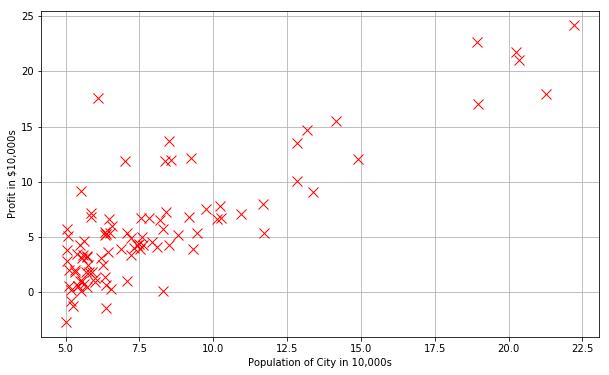

In [53]:
#Whenever working with Data ... visualize
plt.figure(figsize=(10,6)) #how it's gonna be spaced..zerren das bild
plt.plot(X[:,1], y, 'rx',markersize=10) #we don't use the bias 1s in plotting
#plot = (xval, yval, markerstyle, size of markers)
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

In [54]:
#try a linear hypothesis

#start with abitrary weights
w = [[0], [0]]
print(np.transpose(w))


def calcCost(X, y, w):
    guess = X.dot(w)
    errors = np.subtract(guess,y)
    sqrErrors = np.square(errors)
    errorSum = np.sum(sqrErrors)
    J = errorSum / y.size 
    #1/2m in example bc Ng uses half-squared error without explaining jack. Value doesn't matter, just the direction
    return J

K = calcCost(X,y,w)
print (np.arange(10)) #[0 1 2 3 4 5 6 7 8 9]

print(0.01 * (1/m)*(X.T.dot(X.dot(w)-y)))
#print (X.dot(w)-y) #m x 1 matrix or vector
#print (X.T) # 2 x m matrix
#print(np.subtract(w,K*0.01))
print (K)
print (1/m*(X.T.dot(X.dot(w)-y)))

[[0 0]]
[0 1 2 3 4 5 6 7 8 9]
[[-0.05839135]
 [-0.6532885 ]]
64.1454677549
[[ -5.83913505]
 [-65.32884975]]


In [67]:
def gradientDescent (X, y, alpha=0.01, iters=1000, w=[[0],[0]]):
    m = y.size
    Jhistory = np.zeros(iters)
    thetaHis = []
    for i in np.arange(iters): 
        h = X.dot(w)
        w = w - alpha*(1/m) * (X.T.dot(h-y)) #1/m and X.T.dot are part of the derivative (X.T.dot --> for loop with *x(i))
        thetaHis.append(w);
        Jhistory[i] = calcCost(X,y,w)    
    return (w, Jhistory, thetaHis)
    
#print (gradientDescent(X,y))

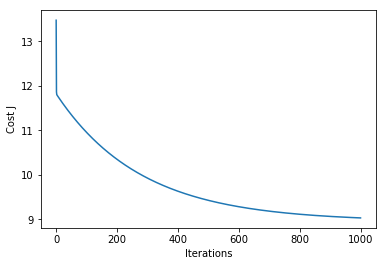

In [68]:
#plot function output
theta, Jhis, thetaHis = gradientDescent(X,y)
plt.plot(Jhis) #put 0 at origin...well
plt.ylabel('Cost J')
plt.xlabel('Iterations');


[array([[ 0.05839135],
       [ 0.6532885 ]]), array([[ 0.06289175],
       [ 0.77000978]]), array([[ 0.05782293],
       [ 0.79134812]]), array([[ 0.05106363],
       [ 0.79572981]]), array([[ 0.04401438],
       [ 0.79709618]]), array([[ 0.03692413],
       [ 0.79792547]]), array([[ 0.02983712],
       [ 0.79865824]]), array([[ 0.02276118],
       [ 0.79937279]]), array([[ 0.0156977 ],
       [ 0.80008305]]), array([[ 0.0086469],
       [ 0.8007915]]), array([[ 0.00160879],
       [ 0.80149857]]), array([[-0.00541662],
       [ 0.80220436]]), array([[-0.01242938],
       [ 0.80290886]]), array([[-0.01942949],
       [ 0.8036121 ]]), array([[-0.02641699],
       [ 0.80431407]]), array([[-0.03339189],
       [ 0.80501478]]), array([[-0.04035421],
       [ 0.80571422]]), array([[-0.04730399],
       [ 0.8064124 ]]), array([[-0.05424124],
       [ 0.80710932]]), array([[-0.06116598],
       [ 0.80780498]]), array([[-0.06807824],
       [ 0.8084994 ]]), array([[-0.07497804],
       [ 0.80

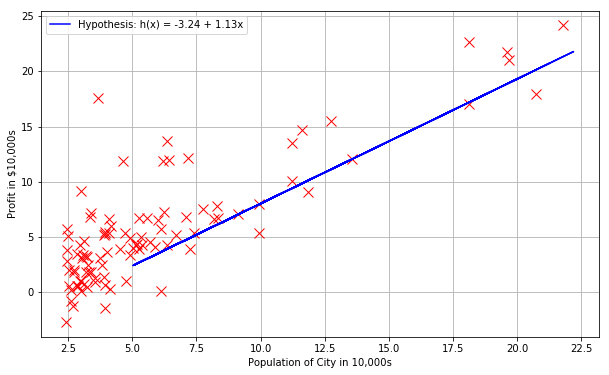

In [69]:
# print (X[:,0] * theta[0])
# print (X[:,1] * theta[1])

def myHypotheses(X, theta):
    hyp = X[:,0] * theta[0] + X[:,1] * theta[1]
    return hyp

g = myHypotheses(X, theta)
#print (g)
plt.figure(figsize=(10,6)) #how it's gonna be spaced..zerren das bild
plt.plot(g, y[:,0], 'rx',markersize=10) #we don't use the bias 1s in plotting
plt.plot(X[:,1],g,'b-',label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()

NameError: name 'jvec' is not defined

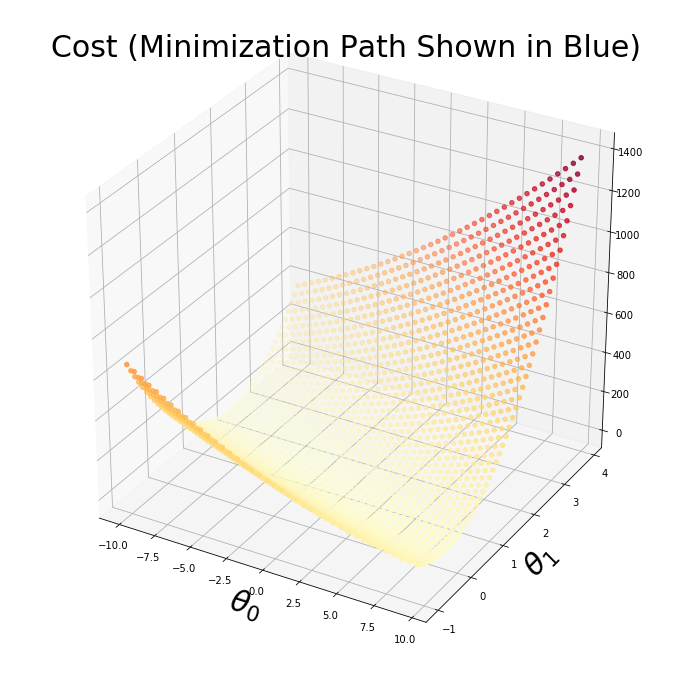

In [71]:
#Import necessary matplotlib tools for 3d plots
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for david in xvals:
    for kaleko in yvals:
        myxs.append(david)
        myys.append(kaleko)
        myzs.append(calcCost(X,y, np.array([[david], [kaleko]])))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('YlOrRd'))

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
plt.plot([x[0] for x in thetaHis],[x[1] for x in thetaHis],jvec,'bo-')
plt.show()